In [2]:
!pip install tensorflow

     |████████████████████████████████| 588.3 MB 9.9 kB/s eta 0:00:01     |███████████▉                    | 218.2 MB 3.5 MB/s eta 0:01:46     |██████████████████████          | 402.9 MB 382 kB/s eta 0:08:06     |██████████████████████████████▏ | 554.9 MB 2.8 MB/s eta 0:00:13
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     |████████████████████████████████| 2.4 MB 1.0 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 21.5 MB 2.9 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 1.1 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 85 kB/s  eta 0:00:01
     |████████████████████████████████| 439 kB 3.3 MB/s eta 0:00:01
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 M

In [3]:
import tensorflow as tf
tf.keras.utils.get_file('cats_and_dogs_filtered.zip',"https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip")

2023-02-26 15:18:00.078388: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 15:18:00.209348: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-26 15:18:00.212413: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-26 15:18:00.212430: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

'/home/salman/.keras/datasets/cats_and_dogs_filtered.zip'

In [4]:
import os
import zipfile #to handle zip file

local_zip = '/home/salman/.keras/datasets/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
!ls

 10110.jpg			  kawasaki-ninja-h2-bike-500x500.png
 adidas111000.jpg		  KTM.jpg
 BMW.jpg			 'NATURAL IMAGES.ipynb'
 BMW-M4_GT4-2023-1600-02.jpg	  nike_adidas_and_converse
 Butterfly-on-leaf-1024x535.jpg   NIKE-ADIDAS_CONVERSE.ipynb
'CALTECH 101.ipynb'		 'Reptile and Insects.ipynb'
 cats_and_dogs_filtered		  rose.jpeg
'Gano Cat Breed.ipynb'		  Untitled.ipynb


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

In [7]:
std_normalize = transforms.Normalize(mean=[0, 0, 0],std=[1, 1, 1])

In [8]:
trans_train = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomRotation(5),
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    std_normalize
])
trans_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    std_normalize
])

In [9]:
train_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/train',transform=trans_train)

In [10]:
train_dataset.classes

['cats', 'dogs']

In [11]:
test_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/validation',transform=trans_test)

In [12]:
batch_size = 8

In [13]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: cats_and_dogs_filtered/train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0, 0, 0], std=[1, 1, 1])
           )

In [14]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: cats_and_dogs_filtered/validation
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0, 0, 0], std=[1, 1, 1])
           )

In [15]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [16]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

In [17]:
examples = iter(train_loader)
samples ,labels = next(examples)
print(samples.shape)
labels

torch.Size([8, 3, 224, 224])


tensor([1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

In [20]:
sample_plot = samples[0:16]
label_plot = labels[0:16]

In [21]:
out = torchvision.utils.make_grid(sample_plot)

In [22]:
class_name = train_dataset.classes

In [23]:
class_name

['cats', 'dogs']

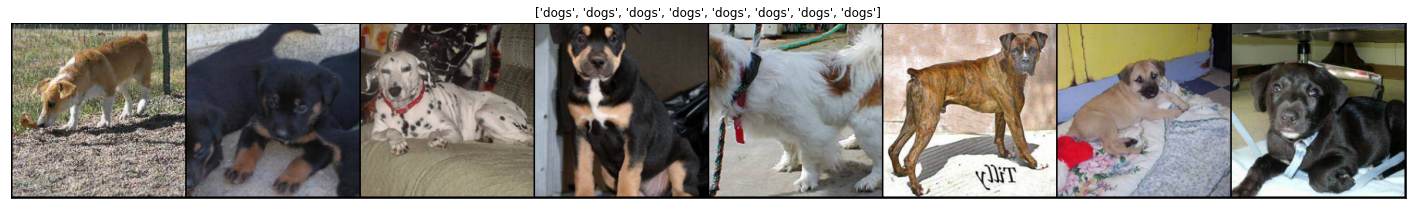

In [24]:
imshow(out,title=[class_name[x] for x in label_plot])

In [25]:
model = nn.Sequential(
nn.Conv2d(3,32,5,padding=1),#222
nn.ReLU(),
nn.MaxPool2d(2,2),#111
#nn.Dropout(0.2),
nn.Conv2d(32,64,5,padding=1),#109
nn.ReLU(),
nn.MaxPool2d(2,2),#54
#nn.Dropout(0.2),
nn.Conv2d(64,128,5,padding=1),#52
nn.ReLU(),
nn.MaxPool2d(2,2),#26
#nn.Dropout(0.2),
nn.Flatten(),
nn.Linear(26*26*128,512),
nn.ReLU(),    
#nn.Dropout(0.2),
nn.Linear(512,1),
nn.Sigmoid())

In [26]:
model

Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=86528, out_features=512, bias=True)
  (11): ReLU()
  (12): Linear(in_features=512, out_features=1, bias=True)
  (13): Sigmoid()
)

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
model = model.to(device)

In [29]:
from torch.nn.modules.loss import BCEWithLogitsLoss
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())
# Model.to(device)

In [30]:
#Train the network
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).float()
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (epoch+1) % 1 == 0:    # 
            print(f'epoch:{epoch+1},loss={running_loss}')
            running_loss = 0.0

print('Finished Training')

epoch:1,loss=0.6893429756164551
epoch:1,loss=4.321603775024414
epoch:1,loss=0.7454956769943237
epoch:1,loss=0.7974209785461426
epoch:1,loss=0.6822943091392517
epoch:1,loss=0.7007718086242676
epoch:1,loss=0.6167128682136536
epoch:1,loss=0.8255215287208557
epoch:1,loss=0.6566890478134155
epoch:1,loss=0.6589440703392029
epoch:1,loss=0.5930032730102539
epoch:1,loss=0.7250299453735352
epoch:1,loss=0.7368329763412476
epoch:1,loss=0.7001217603683472
epoch:1,loss=0.8049007058143616
epoch:1,loss=0.7026522755622864
epoch:1,loss=0.6921194195747375
epoch:1,loss=0.6918327808380127
epoch:1,loss=0.6966261267662048
epoch:1,loss=0.6948638558387756
epoch:1,loss=0.6920563578605652
epoch:1,loss=0.6950547099113464
epoch:1,loss=0.6915302872657776
epoch:1,loss=0.6943110227584839
epoch:1,loss=0.6944081783294678
epoch:1,loss=0.6928943991661072
epoch:1,loss=0.6919137239456177
epoch:1,loss=0.6930474042892456
epoch:1,loss=0.701047420501709
epoch:1,loss=0.6936437487602234
epoch:1,loss=0.6958931684494019
epoch:1,lo

epoch:2,loss=0.6911624073982239
epoch:2,loss=0.699321985244751
epoch:2,loss=0.6952163577079773
epoch:2,loss=0.6931800246238708
epoch:2,loss=0.69517582654953
epoch:2,loss=0.6990784406661987
epoch:2,loss=0.6969892978668213
epoch:2,loss=0.6931737661361694
epoch:2,loss=0.6931719183921814
epoch:2,loss=0.694862961769104
epoch:2,loss=0.6931684017181396
epoch:2,loss=0.6931672096252441
epoch:2,loss=0.6961712837219238
epoch:2,loss=0.6931645274162292
epoch:2,loss=0.6931626796722412
epoch:2,loss=0.6918625235557556
epoch:2,loss=0.6919055581092834
epoch:2,loss=0.6931585669517517
epoch:2,loss=0.6943578720092773
epoch:2,loss=0.690830409526825
epoch:2,loss=0.6931580305099487
epoch:2,loss=0.6920093894004822
epoch:2,loss=0.6966191530227661
epoch:2,loss=0.6920351386070251
epoch:2,loss=0.6942623257637024
epoch:2,loss=0.6920772790908813
epoch:2,loss=0.6942219734191895
epoch:2,loss=0.6941976547241211
epoch:2,loss=0.6911393404006958
epoch:2,loss=0.6931555867195129
epoch:2,loss=0.6931546330451965
epoch:2,loss=

epoch:3,loss=0.6931761503219604
epoch:3,loss=0.6932202577590942
epoch:3,loss=0.691814124584198
epoch:3,loss=0.69454026222229
epoch:3,loss=0.6945124864578247
epoch:3,loss=0.6917679309844971
epoch:3,loss=0.6931062936782837
epoch:3,loss=0.6931281089782715
epoch:3,loss=0.6931744813919067
epoch:3,loss=0.693136990070343
epoch:3,loss=0.6917641162872314
epoch:3,loss=0.6903045773506165
epoch:3,loss=0.6902484893798828
epoch:3,loss=0.6901470422744751
epoch:3,loss=0.6915931701660156
epoch:3,loss=0.6881729364395142
epoch:3,loss=0.698477029800415
epoch:3,loss=0.6931729912757874
epoch:3,loss=0.6931585073471069
epoch:3,loss=0.6912572383880615
epoch:3,loss=0.6931784152984619
epoch:3,loss=0.6911632418632507
epoch:3,loss=0.6993788480758667
epoch:3,loss=0.69109708070755
epoch:3,loss=0.6973710060119629
epoch:3,loss=0.693179190158844
epoch:3,loss=0.693179190158844
epoch:3,loss=0.6931834816932678
epoch:3,loss=0.6931812763214111
epoch:3,loss=0.6910897493362427
epoch:3,loss=0.6931814551353455
epoch:3,loss=0.69

epoch:4,loss=0.6934400200843811
epoch:4,loss=0.6925994753837585
epoch:4,loss=0.693712592124939
epoch:4,loss=0.69364994764328
epoch:4,loss=0.6933513283729553
epoch:4,loss=0.6931116580963135
epoch:4,loss=0.6932632923126221
epoch:4,loss=0.6931881904602051
epoch:4,loss=0.6931371688842773
epoch:4,loss=0.6931479573249817
epoch:4,loss=0.6934131383895874
epoch:4,loss=0.6931301951408386
epoch:4,loss=0.6925163269042969
epoch:4,loss=0.6925927996635437
epoch:4,loss=0.6924677491188049
epoch:4,loss=0.6931542158126831
epoch:4,loss=0.6936854124069214
epoch:4,loss=0.6937237977981567
epoch:4,loss=0.6937758922576904
epoch:4,loss=0.6931460499763489
epoch:4,loss=0.6931526064872742
epoch:4,loss=0.6924707293510437
epoch:4,loss=0.6924200057983398
epoch:4,loss=0.6939103007316589
epoch:4,loss=0.6931501626968384
epoch:4,loss=0.6923446655273438
epoch:4,loss=0.6939871311187744
epoch:4,loss=0.6931459903717041
epoch:4,loss=0.6922811269760132
epoch:4,loss=0.6922644376754761
epoch:4,loss=0.6912803053855896
epoch:4,los

epoch:5,loss=0.6932405233383179
epoch:5,loss=0.6931472420692444
epoch:5,loss=0.6930785775184631
epoch:5,loss=0.6931473016738892
epoch:5,loss=0.6932891011238098
epoch:5,loss=0.693051815032959
epoch:5,loss=0.6930958032608032
epoch:5,loss=0.6931471824645996
epoch:5,loss=0.6933853626251221
epoch:5,loss=0.6930915117263794
epoch:5,loss=0.6931473016738892
epoch:5,loss=0.6931846737861633
epoch:5,loss=0.6931471228599548
epoch:5,loss=0.6931466460227966
epoch:5,loss=0.6931471824645996
epoch:5,loss=0.6931467056274414
epoch:5,loss=0.6931471824645996
epoch:5,loss=0.6931992173194885
epoch:5,loss=0.6930513381958008
epoch:5,loss=0.6931473612785339
epoch:5,loss=0.6929714679718018
epoch:5,loss=0.6931476593017578
epoch:5,loss=0.693462073802948
epoch:5,loss=0.6935098171234131
epoch:5,loss=0.692363977432251
epoch:5,loss=0.6922627091407776
epoch:5,loss=0.6921258568763733
epoch:5,loss=0.6931500434875488
epoch:5,loss=0.6938231587409973
epoch:5,loss=0.6953386068344116
epoch:5,loss=0.6924050450325012
epoch:5,los

tensor([[0.5015],
        [0.5015],
        [0.5015],
        [0.5015],
        [0.5015],
        [0.5015],
        [0.5015],
        [0.5015]], grad_fn=<SigmoidBackward0>)
1
1
1
1
1
1
1
1


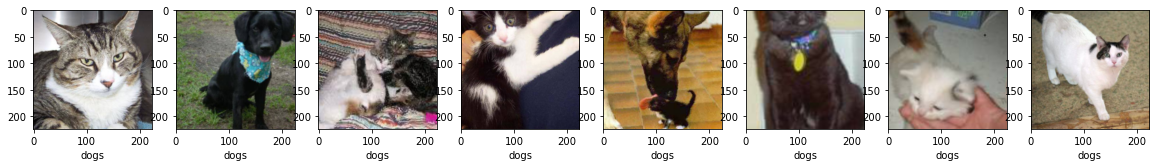

In [31]:
import numpy as np
test_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                         batch_size=batch_size, 
                         shuffle=True)

for features, targets in test_loader:
    break
    

predictions = model(features[:8].to(device))
#print(predictions)
#predictions = int(predictions)
d = test_dataset.classes
#print(d)
print(predictions)
fig, ax = plt.subplots(1, 8, figsize=(20, 10))
for i in range(8):
    img = features[i]
    ax[i].imshow(np.transpose(img, (1, 2, 0)))
    ax[i].set_xlabel(d[int(np.array(predictions[i].item()).round())])
    print(int(np.array(predictions[i].item()).round()))

plt.show()

In [32]:
test = samples[4].view(1,3,224,224)
test = test.to(device)
out = model(test)

In [33]:
out.item()

0.5015252232551575